In [28]:
import openpyxl
import pandas as pd

df = pd.read_excel("GP1_FINAL_Data.xlsx")
df.set_index("Vehicle ID", inplace=True)

xl = pd.ExcelFile("GP1_FINAL_Data.xlsx")
print("Sheets in Excel File:")
print(xl.sheet_names)

Sheets in Excel File:
['Sold Vehicles', 'By Day Data', 'Definitions']


In [29]:
print(f"Starting with {xl.sheet_names[0]}")

df = xl.parse(xl.sheet_names[0])
df.set_index("Vehicle ID", inplace=True)

Starting with Sold Vehicles


In [30]:
print(df.info())
print()
print(df.head())
print()
print(df.tail())
print()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1 to 100
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Manufacturer                100 non-null    object 
 1   Average Desirability        100 non-null    float64
 2   Average Price Position      100 non-null    float64
 3   Buy Price Position          100 non-null    float64
 4   Selling Price Position      100 non-null    float64
 5   Rec selling price           100 non-null    int64  
 6   Buy Price                   100 non-null    int64  
 7   Price Sold                  100 non-null    int64  
 8   Profit                      100 non-null    int64  
 9   Ad Views per car per Day    100 non-null    float64
 10  Benchmark Ad Views per Day  100 non-null    float64
 11  Performance vs Benchmark    100 non-null    float64
 12  Days on Site                100 non-null    int64  
dtypes: float64(7), int64(5), object(1)
memor

In [31]:
print("Total Profit for each category:")
print(df.groupby(['Manufacturer'])["Profit"].sum())
print()
print("Average profit for each category:")
print(df.groupby(["Manufacturer"])["Profit"].mean())
print()
print("-----------------------")
print()
print("Total add views per category per day:")
print(df.groupby(["Manufacturer"])["Ad Views per car per Day"].sum())
print()
print("Average add views per brand per day:")
print(df.groupby(["Manufacturer"])["Ad Views per car per Day"].mean())

Total Profit for each category:
Manufacturer
Audi          34100
BMW           26150
Ford          29000
Vauxhall       7200
Volkswagen    14350
Name: Profit, dtype: int64

Average profit for each category:
Manufacturer
Audi          1705.000000
BMW           1538.235294
Ford           828.571429
Vauxhall       450.000000
Volkswagen    1195.833333
Name: Profit, dtype: float64

-----------------------

Total add views per category per day:
Manufacturer
Audi          398.758449
BMW           338.923611
Ford          538.491903
Vauxhall      135.143635
Volkswagen    133.113266
Name: Ad Views per car per Day, dtype: float64

Average add views per brand per day:
Manufacturer
Audi          19.937922
BMW           19.936683
Ford          15.385483
Vauxhall       8.446477
Volkswagen    11.092772
Name: Ad Views per car per Day, dtype: float64


Correlation between profit and average desirability
-0.21296235760925092


For Filtered DF:
Correlation between profit and desirability
-0.1848193191430929


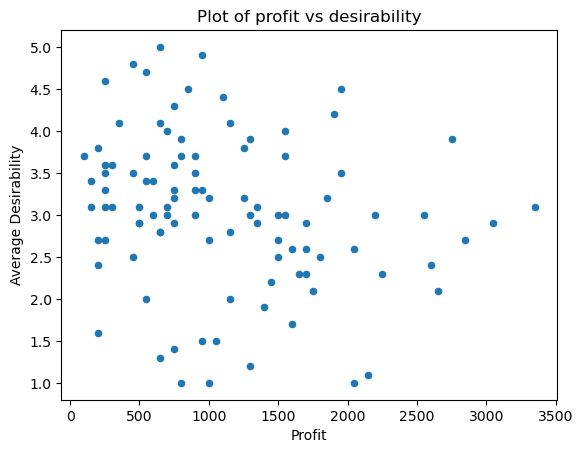

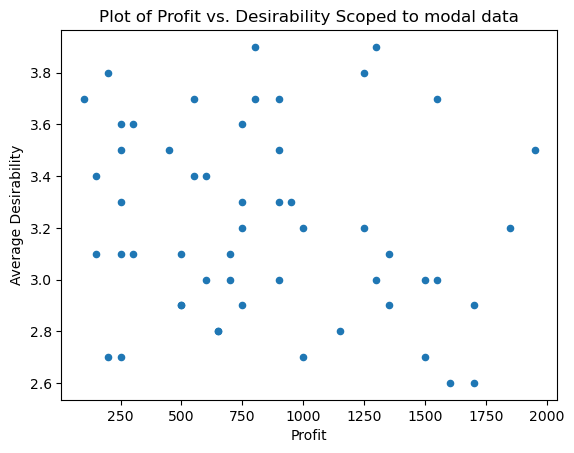

In [37]:
#print("Correlation between ad views per day and profit")
#print(df['Profit'].corr(df['Ad Views per car per Day']))
#print()
print("Correlation between profit and average desirability")
print(df['Profit'].corr(df['Average Desirability']))
print()
df.plot(x="Profit", y="Average Desirability", kind="scatter", title="Plot of profit vs desirability")
print()
df_filtered = df[df['Profit'] < 2000]
df_filtered = df_filtered[df_filtered['Average Desirability'] > 2.5]
df_filtered = df_filtered[df_filtered['Average Desirability'] < 4]
df_filtered.plot(x="Profit", y="Average Desirability", kind="scatter", title="Plot of Profit vs. Desirability Scoped to modal data")
print("For Filtered DF:")
print("Correlation between profit and desirability")
print(df_filtered['Profit'].corr(df_filtered['Average Desirability'])) # Huh??

Recommended selling price average per category
Manufacturer
Audi          16743.450000
BMW           23343.117647
Ford           6351.485714
Vauxhall       3852.437500
Volkswagen    12362.750000
Name: Rec selling price, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Rec selling Price'}, xlabel='Manufacturer'>

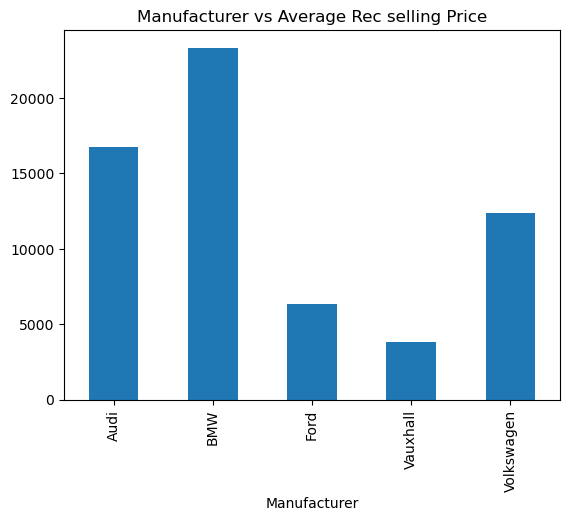

In [43]:
print("Recommended selling price average per category")
df_grouped = df.groupby(["Manufacturer"])["Rec selling price"].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Rec selling price", kind="bar", title="Manufacturer vs Average Rec selling Price")

Actual Selling price average per category
Manufacturer
Audi          15600.000000
BMW           22161.764706
Ford           5712.857143
Vauxhall       3434.375000
Volkswagen    12041.666667
Name: Price Sold, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Price Sold'}, xlabel='Manufacturer'>

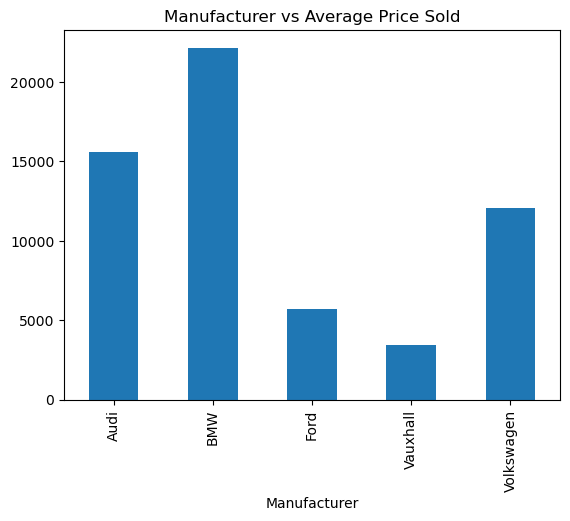

In [44]:
print("Actual Selling price average per category")
df_grouped = df.groupby(['Manufacturer'])["Price Sold"].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Price Sold", kind="bar", title="Manufacturer vs Average Price Sold")

Selling Difference between price sold and recommended selling price.

Manufacturer
Audi         -1143.450000
BMW          -1181.352941
Ford          -638.628571
Vauxhall      -418.062500
Volkswagen    -321.083333
Name: Selling Difference, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Selling Difference'}, xlabel='Manufacturer'>

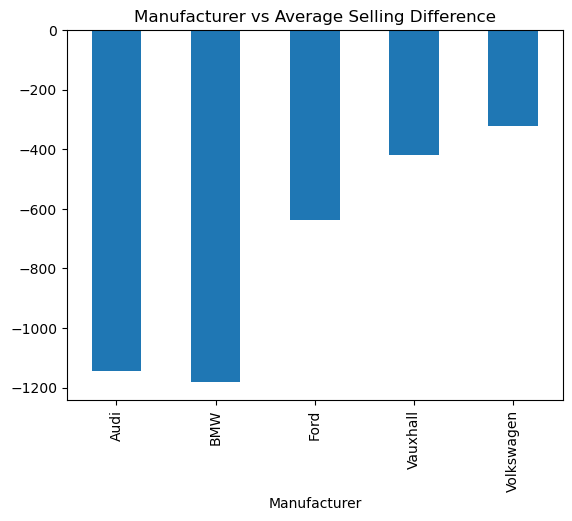

In [47]:
print("Selling Difference between price sold and recommended selling price.")
print()
df['Selling Difference'] = df['Price Sold'] - df['Rec selling price']
df_grouped = df.groupby(['Manufacturer'])['Selling Difference'].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Selling Difference", kind="bar", title="Manufacturer vs Average Selling Difference")

Manufacturer
Audi          1705.000000
BMW           1538.235294
Ford           828.571429
Vauxhall       450.000000
Volkswagen    1195.833333
Name: Profit, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Profit'}, xlabel='Manufacturer'>

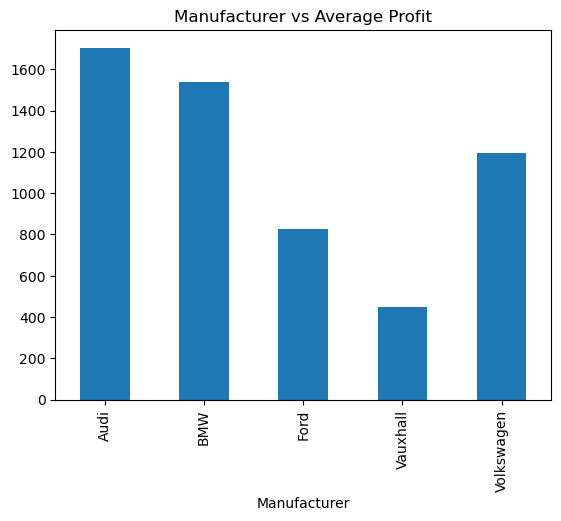

In [48]:
df_grouped = df.groupby(['Manufacturer'])["Profit"].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Profit", kind="bar", title="Manufacturer vs Average Profit")

Correlation between Performance and Profit
-0.18423509283270598



<Axes: title={'center': 'Performance Vs. Profit'}, xlabel='Performance vs Benchmark', ylabel='Profit'>

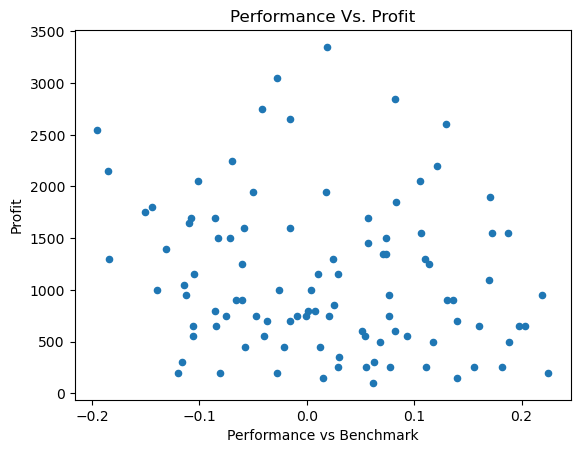

In [35]:
print("Correlation between Performance and Profit")
print(df["Performance vs Benchmark"].corr(df["Profit"]))
print()
df.plot(x="Performance vs Benchmark", y="Profit", kind="scatter", title="Performance Vs. Profit")

Average performance for categories
Manufacturer
Audi          0.038364
BMW          -0.092350
Ford          0.061801
Vauxhall      0.095669
Volkswagen   -0.102681
Name: Performance vs Benchmark, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Performance'}, xlabel='Manufacturer'>

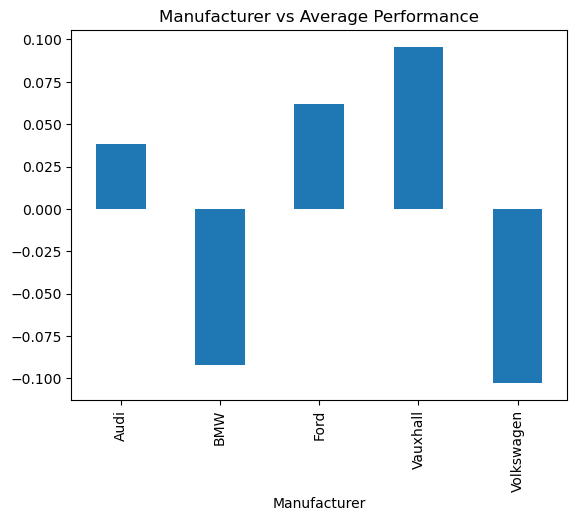

In [42]:
print("Average performance for categories")
df_grouped = df.groupby(["Manufacturer"])["Performance vs Benchmark"].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Performance vs Benchmark", kind="bar", title="Manufacturer vs Average Performance")

Manufacturer
Audi          32.400000
BMW           41.352941
Ford          26.228571
Vauxhall      28.062500
Volkswagen    37.750000
Name: Days on Site, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Days on Site'}, xlabel='Manufacturer'>

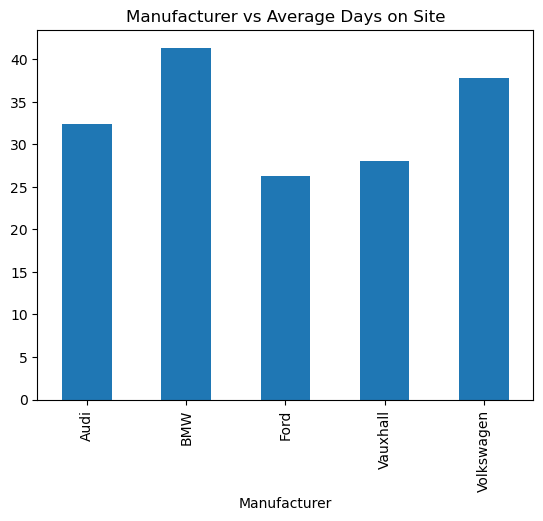

In [49]:
df_grouped = df.groupby(["Manufacturer"])["Days on Site"].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Days on Site", kind="bar", title="Manufacturer vs Average Days on Site")

Manufacturer
Audi          0.737922
BMW          -1.963317
Ford          0.885483
Vauxhall      0.746477
Volkswagen   -1.307228
Name: Ad Difference, dtype: float64


<Axes: title={'center': 'Manufacturer vs Average Ad Difference'}, xlabel='Manufacturer'>

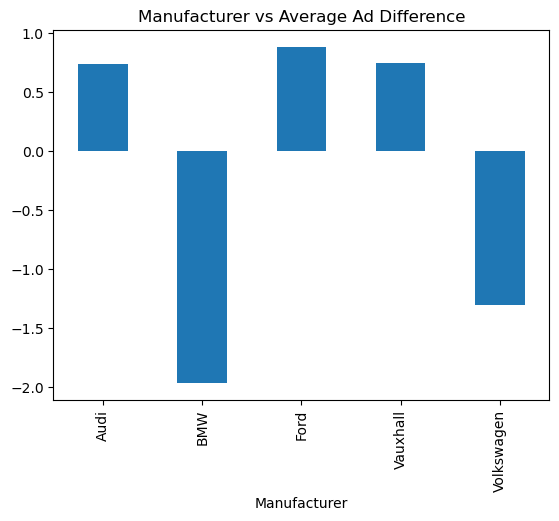

In [51]:
df['Ad Difference'] = df['Ad Views per car per Day'] - df['Benchmark Ad Views per Day']
df_grouped = df.groupby(['Manufacturer'])['Ad Difference'].mean()
print(df_grouped)
df_grouped.plot(x="Manufacturer", y="Ad Difference", kind="bar", title="Manufacturer vs Average Ad Difference")